### Definitions:
- "Runner" is the name of the person who placed the bet.
- "ExpROI" is the model's expected return on investment. 
- "Stake" is the amount the runner successfully placed on the selection.
- "PriceTaken" is the odds that the runner placed, in decimal format. 
- "EW" is a binary indicator of whether the bet was an Each Way bet. 
- "Terms" is the denominator in the EW price. e.g.) Terms = 3 implies a 1/3 EW bet.
- "Deduction" is the "Rule 4" deduction for the horse. e.g.) Deduction = 0.1 implies a 10p deduction.
- "BSP" is the Betfair Starting Price, the odds found on Betfair Exchange for the horse to win at the race start time.
- "BSPplace" is the Betfair Starting Price for the horse to place, found at the race start time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
#import data from csv file
runner_bets_df = pd.read_csv('runner_bets.csv')
runner_bets_df

,Date,Runner,RaceID,Horse,ExpROI,Stake,PriceTaken,EW,Places,Terms,Winner,Placed,Deduction,BSP,BSPplace,Time_Placed
0,2021-04-01,RichardW,Ffos Las 17:42,This Breac,0.158000,40.0,26.0,0,1,0,0.0,0.0,0.0,17.000000,4.550097,09:56
1,2021-04-01,RichardW,Ffos Las 17:10,Timassini,0.117250,50.0,21.0,0,1,0,0.0,0.0,0.0,23.000000,5.657376,09:56
2,2021-04-01,RichardW,Ffos Las 17:42,Do It For Thy Sen,0.046130,200.0,6.0,0,1,0,0.0,0.0,0.0,4.925280,2.107342,09:56
3,2021-04-01,StepR,Ffos Las 17:10,Saddlers Quest,0.055380,30.0,19.0,0,1,0,0.0,0.0,0.0,11.503926,4.054723,08:59
4,2021-04-01,PaulR,Ffos Las 17:10,Saddlers Quest,0.055380,50.0,19.0,0,1,0,0.0,0.0,0.0,11.503926,4.054723,10:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82132,2021-11-16,Jimmy,Ayr 14:15,Ask Blossomfort,0.021531,200.0,8.5,0,1,0,1.0,1.0,0.0,11.500000,3.550783,13:31
82133,2021-11-16,PaulS,Ayr 14:15,Ask Blossomfort,0.021531,100.0,9.0,0,1,0,1.0,1.0,0.0,11.500000,3.550783,13:34
82134,2021-11-16,PaulS,Ayr 14:50,Upandatit,0.064159,75.0,15.0,0,1,0,0.0,1.0,0.0,12.184800,3.042881,14:02
82135,2021-11-16,Tassos,Ayr 15:53,Paddock Cottage,0.052600,600.0,4.5,0,1,0,0.0,1.0,0.0,5.800000,1.940000,15:28


## Q1:
Assume that BSP and BSPplace are prices representing the true probability for a horse to win and place, respectively.

- a). Plot the cumulative PnL and EV as a function of time in days.

- b). Plot a 2-week rolling PnL and EV average.

- c). Do you think that your assumed EV is an accurate representation of your real edge? (Hint: Run a Monte Carlo simulation).

#### General Equation for PnL and EV in Case where there is EW betting and deductions: 

I was honestly very confused with the dynamics of how the deductions / terms variables work but I developed these equations for the PnL and EV based on my understanding of how they work.

$$
\text{PnL} = s * ((b - d) * w + \frac{1}{T + (1 - e)} * b_p * p * e - (1 + e))
$$

$$
EV = p_w * s\left(b - d + \frac{1}{T + (1 - e)} * b_p * p * e\right) - s * (1 - p_w)(1 + e)
$$

where 

- $b$ = BSP
- $b_p$ = BSPplace
- $w$ = winner
- $d$ = deduction
- $s$ = stake
- $T$ = Terms
- $e$ = EW
- $p$ = placed
- $p_w = \left(\frac{1}{b} + e\frac{1}{b_p}\right)$ is the probability of winning a bet

In [17]:
b = runner_bets_df['BSP']
s = runner_bets_df['Stake']
e = runner_bets_df['EW']
w = runner_bets_df['Winner']
p = runner_bets_df['Placed']
T = runner_bets_df['Terms']
d = runner_bets_df['Deduction']
b_p = runner_bets_df['BSPplace']
p_w = (1 / b + e*(1 / b_p))

#calculate PnL and EV
runner_bets_df['PnL'] = s * ((b - d)*w + (1 / (T + 1 - e)) * b_p * p * e - (1 + e))
runner_bets_df['EV'] = p_w * s * (b - d + (1 / (T + 1 - e)) * b_p * p * e) - s * (1 - p_w) * (1 + e)

In [29]:
runner_bets_df

,Date,Runner,RaceID,Horse,ExpROI,Stake,PriceTaken,EW,Places,Terms,...,Placed,Deduction,BSP,BSPplace,Time_Placed,Day,PnL,EV,Cumulative PnL,Cumulative EV
0,2021-04-01,RichardW,Ffos Las 17:42,This Breac,0.158000,40.0,26.0,0,1,0,...,0.0,0.0,17.000000,4.550097,09:56,0,-40.0,2.352941,-40.0,2.352941
1,2021-04-01,RichardW,Ffos Las 17:10,Timassini,0.117250,50.0,21.0,0,1,0,...,0.0,0.0,23.000000,5.657376,09:56,0,-50.0,2.173913,-90.0,4.526854
2,2021-04-01,RichardW,Ffos Las 17:42,Do It For Thy Sen,0.046130,200.0,6.0,0,1,0,...,0.0,0.0,4.925280,2.107342,09:56,0,-200.0,40.606832,-290.0,45.133686
3,2021-04-01,StepR,Ffos Las 17:10,Saddlers Quest,0.055380,30.0,19.0,0,1,0,...,0.0,0.0,11.503926,4.054723,08:59,0,-30.0,2.607805,-320.0,47.741491
4,2021-04-01,PaulR,Ffos Las 17:10,Saddlers Quest,0.055380,50.0,19.0,0,1,0,...,0.0,0.0,11.503926,4.054723,10:01,0,-50.0,4.346342,-370.0,52.087833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82132,2021-11-16,Jimmy,Ayr 14:15,Ask Blossomfort,0.021531,200.0,8.5,0,1,0,...,1.0,0.0,11.500000,3.550783,13:31,229,2100.0,17.391304,inf,inf
82133,2021-11-16,PaulS,Ayr 14:15,Ask Blossomfort,0.021531,100.0,9.0,0,1,0,...,1.0,0.0,11.500000,3.550783,13:34,229,1050.0,8.695652,inf,inf
82134,2021-11-16,PaulS,Ayr 14:50,Upandatit,0.064159,75.0,15.0,0,1,0,...,1.0,0.0,12.184800,3.042881,14:02,229,-75.0,6.155210,inf,inf
82135,2021-11-16,Tassos,Ayr 15:53,Paddock Cottage,0.052600,600.0,4.5,0,1,0,...,1.0,0.0,5.800000,1.940000,15:28,229,-600.0,103.448272,inf,inf


In [28]:
runner_bets_df[runner_bets_df['EW'] == np.ones(len(runner_bets_df))]

,Date,Runner,RaceID,Horse,ExpROI,Stake,PriceTaken,EW,Places,Terms,...,Placed,Deduction,BSP,BSPplace,Time_Placed,Day,PnL,EV,Cumulative PnL,Cumulative EV
3281,2021-04-15,Anthony,Newcastle 17:55,Majalaat,0.09878,52.0,26.0000,1,3,5,...,1.0,0.0,32.881454,6.684255,10:04,14,-34.483752,235.036470,-7.102375e+04,3.246919e+05
3771,2021-04-17,KarlR,Thirsk 13:10,Ghathanfar,0.02170,200.0,3.7500,1,3,5,...,1.0,0.0,3.165779,1.401012,11:35,16,-343.959532,721.488648,-1.113344e+05,3.642962e+05
3862,2021-04-17,KarlR,Brighton 16:55,Dusky Prince,0.11442,180.0,4.3333,1,3,5,...,1.0,0.0,2.420000,1.310000,15:15,16,122.760012,631.576209,-1.172083e+05,3.685203e+05
5505,2021-04-25,Ant,Salisbury 14:00,Angel Bleu,0.12203,360.0,3.2000,1,3,5,...,1.0,0.0,3.203666,1.394509,12:53,24,533.724335,1311.437104,-1.950929e+05,5.056921e+05
6937,2021-05-01,John,Goodwood 14:35,Kings Knight,0.12313,700.0,2.7500,1,3,5,...,1.0,0.0,2.560000,1.390000,13:38,30,-1205.400002,2359.293511,-9.896502e+04,6.783755e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82112,2021-11-16,JamesParker,Limerick 13:55,Peace Party,0.13223,500.0,7.0000,1,4,5,...,1.0,0.0,9.049417,2.712310,13:22,229,-728.769040,1777.378354,inf,inf
82114,2021-11-16,JohnBucksey,Limerick 13:55,Peace Party,0.13223,200.0,7.0000,1,3,4,...,1.0,0.0,9.049417,2.712310,13:31,229,-264.384520,723.948562,inf,inf
82124,2021-11-16,Duncan,Limerick 13:55,Peace Party,0.13004,160.0,7.0000,1,3,4,...,1.0,0.0,9.049417,2.712310,13:16,229,-211.507616,579.158850,inf,inf
82125,2021-11-16,MikeB,Ayr 15:23,Shanroe Al C,0.03205,1000.0,11.0000,1,3,5,...,1.0,0.0,7.768724,2.494291,14:05,229,6267.582607,3438.089785,inf,inf


In [19]:
#convert dates to day number and add column
import datetime
dates_list = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in runner_bets_df['Date']]
d0 = dates_list[0]
days = [(date - d0).days for date in dates_list]
runner_bets_df['Day'] = days

#make column for cumulative PnL and EV
runner_bets_df['Cumulative PnL'] = np.cumsum(runner_bets_df['PnL'])
runner_bets_df['Cumulative EV'] = np.cumsum(runner_bets_df['EV'])

In [22]:
len(runner_bets_df)

82137

Text(0, 0.5, 'Cumulative EV')

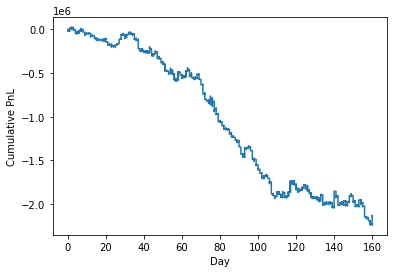

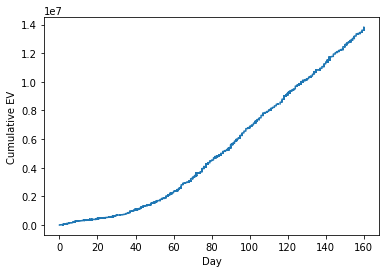

In [20]:
plt.figure()
plt.plot(runner_bets_df['Day'], runner_bets_df['Cumulative PnL'], label='Cumulative PnL')
plt.xlabel('Day')
plt.ylabel('Cumulative PnL')

plt.figure()
plt.plot(runner_bets_df['Day'], runner_bets_df['Cumulative EV'], label='Cumulative EV')
plt.xlabel('Day')
plt.ylabel('Cumulative EV')

In [4]:
runner_bets_df['Date'][0]

'2021-04-01'